# Oscillating Skateboard Simulation

## Equations of Motion
Equation of motion for skateboard pendulum:

$$\ddot\phi = -\frac{g}{R}sin\phi$$

Define new variable for angular velocity: 

$$\omega = \frac{d\phi}{dt}$$

Seperate EOM into two first order ODEs: 

$$\frac{d\phi}{dt}=\omega$$

$$\frac{d\omega}{dt}=-\frac{g}{R}sin\phi$$

## Code

In [1]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



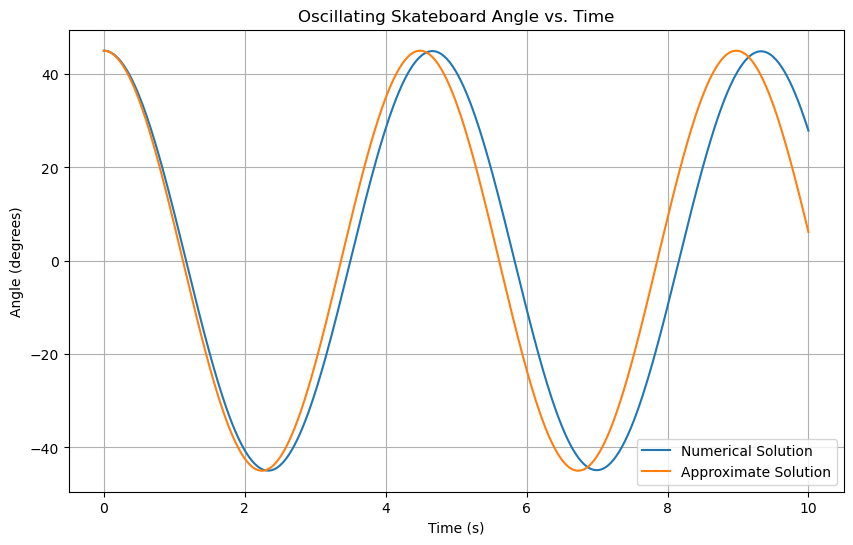

In [2]:
# --- 1. Define the system of first-order differential equations ---
def skateboard_pendulum(t, y, g, R):
    """
    Defines the system of first-order ODEs for an oscillating skateboard.
    y[0] = phi (angle)
    y[1] = omega (angular velocity)
    """
    phi, omega = y
    dydt = [omega, -(g / R) * np.sin(phi)]
    return dydt

# --- 2. Set initial conditions and parameters ---
# Parameters
g = 9.8  # Acceleration due to gravity (m/s^2)
R = 5.0  # Effective length to center of gravity (meters)

# Initial conditions
phi_initial = np.radians(45)  # Initial angle in radians (15 degrees)
omega_initial = 0          # Initial angular velocity (starting from rest)
y0 = [phi_initial, omega_initial]

# Time span for the simulation
t_span = (0, 10)  # Simulate from 0 to 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)

# --- 3. Solve the differential equation ---
solution = solve_ivp(
    skateboard_pendulum, 
    t_span, 
    y0, 
    args=(g, R), 
    t_eval=t_eval
)

# --- 4. Plot the results ---
phi_sol = solution.y[0]
omega_sol = solution.y[1]

# Convert angle back to degrees for plotting
phi_degrees = np.degrees(phi_sol)

#Approximate Solution

approx_phi = phi_initial*np.cos(np.sqrt(g/R)*t_eval)

plt.figure(figsize=(10, 6))
plt.plot(solution.t, phi_degrees, label='Numerical Solution')
plt.plot(t_eval,np.degrees(approx_phi),label='Approximate Solution')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Oscillating Skateboard Angle vs. Time')
plt.grid(True)
plt.legend()
plt.show()


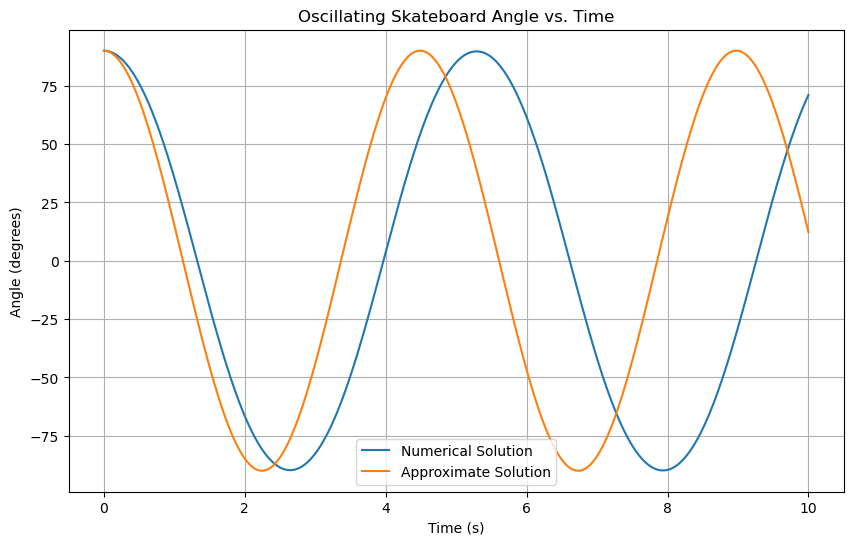

In [3]:
# --- 2. Set initial conditions and parameters ---
# Parameters
g = 9.8  # Acceleration due to gravity (m/s^2)
R = 5.0  # Effective length to center of gravity (meters)

# Initial conditions
phi_initial = np.radians(90)  # Initial angle in radians (15 degrees)
omega_initial = 0.0             # Initial angular velocity (starting from rest)
y0 = [phi_initial, omega_initial]

# Time span for the simulation
t_span = (0, 10)  # Simulate from 0 to 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)

# --- 3. Solve the differential equation ---
solution = solve_ivp(
    skateboard_pendulum, 
    t_span, 
    y0, 
    args=(g, R), 
    t_eval=t_eval
)

# --- 4. Plot the results ---
phi_sol = solution.y[0]
omega_sol = solution.y[1]

# Convert angle back to degrees for plotting
phi_degrees = np.degrees(phi_sol)

#Approximate Solution

approx_phi = phi_initial*np.cos(np.sqrt(g/R)*t_eval)

plt.figure(figsize=(10, 6))
plt.plot(solution.t, phi_degrees, label='Numerical Solution')
plt.plot(t_eval,np.degrees(approx_phi),label='Approximate Solution')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Oscillating Skateboard Angle vs. Time')
plt.grid(True)
plt.legend()
plt.show()